# Anisotropy parameters for a 1-electron system using the Cooper-Zare (CZ) model.

Cooper and Zare showed that the form of the angular distribution
in the simplest (atomic) case can be expressed more simply as:

\begin{equation}
I(\theta)=\frac{2\pi}{(2l+1)^{2}}\left\{ l(l+1)\left[\sigma_{l-1}^{2}+\sigma_{l+1}^{2}+2\sigma_{l+1}\cos(\delta_{l+1}-\delta_{l-1})\right]+\left[l(l-1)\sigma_{l-1}^{2}+(l+1)(l+2)\sigma_{l+1}^{2}-6l(l+1)\sigma_{l+1}\sigma_{l-1}\cos(\delta_{l+1}-\delta_{l-1})\right]\cos^{2}(\theta)\right\} \label{eq:CZ-Itheta-full}
\end{equation}

where $\sigma_{l}$ is the $l$-channel cross-section, and $\delta_{l}$
the scattering phase. The derivation of this form of the observable
follows from application of the selection rules (implicit in the $3j$
symbols) to reduce the allowed continuum states to just the two terms
$(l+1)$ and $(l-1)$, under the assumption that the initial state
is defined by a single $l$ (and summed over all $m$). The cylindrical
symmetry of the problem also means that the $\phi$ dependence can
be dropped.

By comparing this equation to the general form,

\begin{equation}
I(\theta)=\frac{\sigma_{total}}{4\pi}\left[1+\beta_{2}P_{2}(\cos(\theta))\right]\label{eq:Itheta-CZ}
\end{equation}
where $\sigma_{total}$ is the total ($l$-summed) cross-section,
and the terms in square brackets are the $L=0,\,2$ contributions,
normalised to the total cross-section), an equation expressing $\beta_{2}$
can be derived,

\begin{equation}
\beta_{2}=\frac{l(l-1)\sigma_{l-1}^{2}+(l+1)(l+2)\sigma_{l+1}^{2}-6l(l+1)\sigma_{l+1}\sigma_{l-1}\cos(\delta_{l+1}-\delta_{l-1})}{(2l+1)\left[l\sigma_{l-1}^{2}+(l+1)\sigma_{l+1}^{2}\right]}\label{eq:CZ-B2}
\end{equation}

The python code below implements the simple CZ solution. In the code $lp$ and $lm$ denote the full matrix elements for $l+1, l-1$ respectively, and the values of the matrix elements are set in complex form.

The sections are:
* Init - load modules and define functions
* Compute (basic) - single $\beta_2$ value for inputs $(l,lp,lm)$
* Compute (polar) - interactive polar plot $I(\theta)$, with sliders for $(l,lp,lm,\delta)$, where $\delta$ is the phase difference between the states.

## Init

In [1]:
# Numpy for various functions
import numpy as np

# Load Holoviews for interactive plotting
import holoviews as hv
hv.extension()

In [2]:
# Define beta calculation, CZ formula, pass l (intial state quantum number), lp and lm (complex values for final states l+1, l-1)
def betaCZ(l,lp,lm):
    # Define x-sections sigma as square of radial matrix elements
    sigmaP=lp*lp.conjugate()
    sigmaM=lm*lm.conjugate()

    # Calculate beta
    # Use abs and phase values of the complex matrix elements for the interference term to match original CZ formalism.
    beta=(l*(l-1)*sigmaM)+((l+1)*(l+2)*sigmaP)-(6*l*(l+1)*np.absolute(lp)*np.absolute(lm)*np.cos(np.angle(lp)-np.angle(lm)))
    beta=beta/((2*l+1)*(l*sigmaM+(l+1)*sigmaP))
    
    return beta

## Compute - basic version, with a single parameter set.

In [3]:
# Set the initial state
l=1

# Set radial matrix elements for final states (complex form), for lm set to 0 if l=0
lp=1+0j
lm=1+0j
if l==0:
    lm=0
    
# Calculate beta
print(betaCZ(l,lp,lm))

(-0.6666666666666666+0j)


## Compute - interactive polar plot

:DynamicMap   [l,lp,lm,delta]
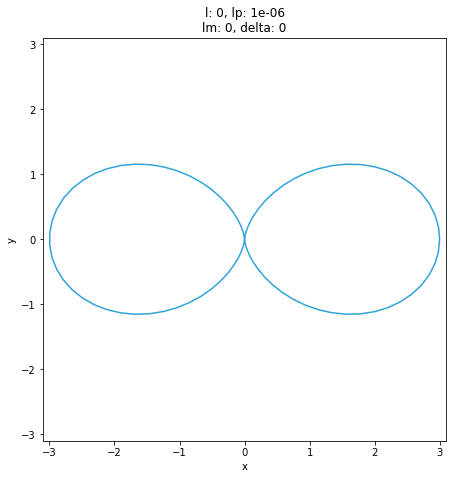

In [4]:
%%opts Path [fig_size=200 aspect=1]
               
# Define plotting function. Set magnitudes and phase difference delta as variable.
def betaPlotPAD(l,lp,lm,delta):

    # Calculate beta value
    beta=np.real(betaCZ(l,lp*np.exp(1j*delta),lm))
    
    # Calculate PAD
    theta=np.linspace(0,2*np.pi,100)
    Itheta=1+beta*0.5*(3*np.cos(theta)**2-1)
    
    x=Itheta*np.cos(theta)
    y=Itheta*np.sin(theta)
    
    # Return a path, for (x,y) list of points. Explicitly set limits to prevent auto resize.
    return hv.Path((x,y), extents=(-3.1, -3.1, 3.1, 3.1))          

# Set kdims, dimensions for Holoview DynamicMap. Clip lp >0 to avoid error on first plot!
kdims=[hv.Dimension('l', values=(0, 1, 2, 3, 4)),hv.Dimension('lp', range=(0.000001,1.1)),
       hv.Dimension('lm', range=(0,1.1)),hv.Dimension('delta', range=(0,2*np.pi)),]

dmapPAD = hv.DynamicMap(betaPlotPAD, kdims=kdims)

dmapPAD